## Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


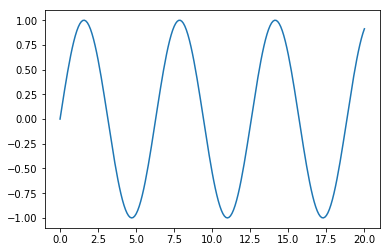

In [2]:
X = np.linspace(0, 20, 201)
plt.plot(X,np.sin(X))
y = np.sin(X)

In [3]:
from sklearn import tree
dt = tree.DecisionTreeRegressor(max_depth=1)

In [4]:
dt.fit(X.reshape(-1, 1),y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Step 1 

Here, all we are doing is using an average of our values as a model of our data. Note that the "actual function" of our data is a sin curve. We are going to try and approximate that by way of boosting and a decision tree regressor!

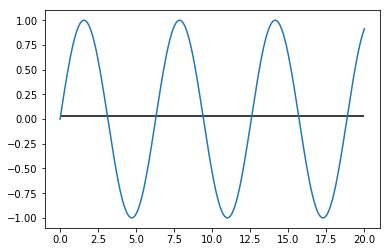

In [6]:
plt.plot(X,np.sin(X))
f0 = np.sin(X).mean()
plt.hlines(f0,0,20)

##### OK, so we have our extremely basic, extremely inaccurate model. Let's go ahead and build off of that

In [7]:

e0 = np.sin(X) - f0
e0

array([-0.03169512,  0.0681383 ,  0.16697421,  0.26382509,  0.35772323,
        0.44773042,  0.53294736,  0.61252257,  0.68566097,  0.75163179,
        0.80977587,  0.85951224,  0.90034397,  0.93186307,  0.95375461,
        0.96579987,  0.96787849,  0.95996969,  0.94215251,  0.91460497,
        0.87760231,  0.83151425,  0.77680129,  0.7140101 ,  0.64376806,
        0.56677703,  0.48380625,  0.39568476,  0.30329303,  0.20755421,
        0.10942489,  0.00988555, -0.09006926, -0.18944081, -0.28723622,
       -0.38247834, -0.47421556, -0.56153126, -0.64355301, -0.71946128,
       -0.78849761, -0.84997223, -0.90327089, -0.94786105, -0.98329719,
       -1.00922523, -1.02538612, -1.03161837, -1.02785973, -1.01414773,
       -0.99061939, -0.9575098 , -0.91514977, -0.86396256, -0.8044596 ,
       -0.73723544, -0.66296175, -0.58238066, -0.4962973 , -0.40557178,
       -0.31111062, -0.21385762, -0.11478452, -0.01488122,  0.08485409,
        0.18342487,  0.27984625,  0.3731548 ,  0.46241823,  0.54

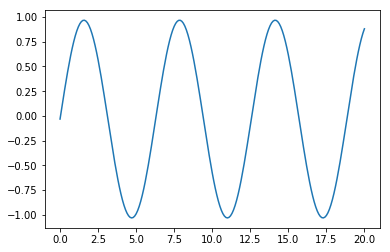

In [9]:
##plotting residuals
plt.plot(X,e0)

### Step 2: fitting a "stump" to the residuals

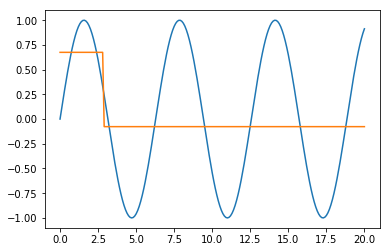

In [10]:
f1 = tree.DecisionTreeRegressor(max_depth=1)

f1.fit(X.reshape(-1, 1),e0)
ensemble_preds_1 = f1.predict(X.reshape(-1, 1)) + f0

plt.plot(X,np.sin(X))
plt.plot(X,ensemble_preds_1)


### Step 3: fitting another "stump" to the residuals of the previous model

In [11]:
e1 = np.sin(X) - (f0 + f1.predict(X.reshape(-1, 1)))

Text(0.5,1,'fitting to residuals (y - (f0(x) + f1(x)))')

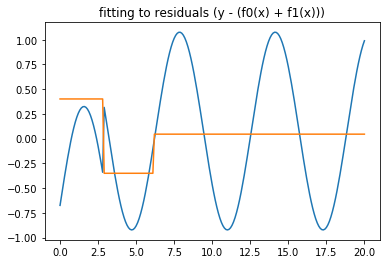

In [13]:
data = X.reshape(-1, 1)
f2 = tree.DecisionTreeRegressor(max_depth=1)
f2.fit(X.reshape(-1, 1),e1)
plt.plot(X,e1)
ensemble_preds_2 = f1.predict(data) + f2.predict(data) + f0
plt.plot(X, ensemble_preds_2)
plt.title('fitting to residuals (y - (f0(x) + f1(x)))')

Text(0.5,1,'Model v. our "data"')

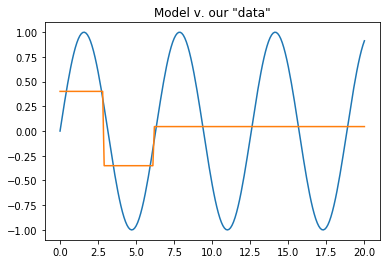

In [14]:
plt.plot(X,np.sin(X))
plt.plot(X, ensemble_preds_2)
plt.title('Model v. our "data"')

### Fitting yet another "stump"

Text(0.5,1,'fitting to residuals (y - (f0(x) + f1(x) + f2(x)))')

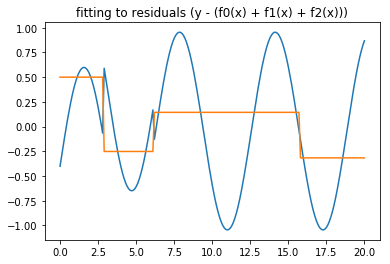

In [15]:
e2 = np.sin(X) - (f2.predict(data) + f1.predict(data) + f0)
f3 = tree.DecisionTreeRegressor(max_depth=1)
f3.fit(X.reshape(-1, 1),e2)
plt.plot(X,e2)
ensemble_preds_3 = f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
plt.plot(X,ensemble_preds_3)
plt.title('fitting to residuals (y - (f0(x) + f1(x) + f2(x)))')

Text(0.5,1,'Model v. our "data"')

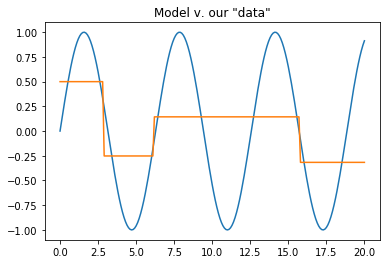

In [17]:
plt.plot(X,np.sin(X))
plt.plot(X,ensemble_preds_3)
plt.title('Model v. our "data"')

### another one

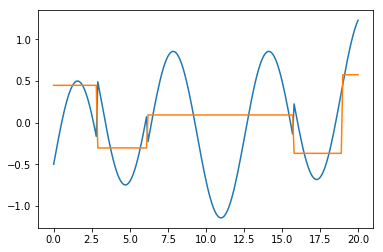

In [92]:
e3 = np.sin(X) - (f3.predict(data) + f2.predict(data) + f1.predict(data) + f0)
f4 = tree.DecisionTreeRegressor(max_depth=1)
f4.fit(data,e3)
plt.plot(X,e3)
ensemble_preds_4 = f4.predict(data) + f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
plt.plot(X,ensemble_preds_4)

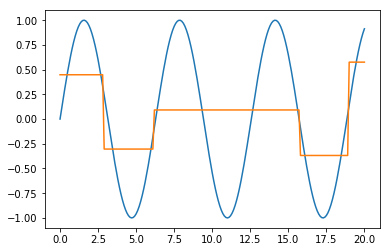

In [93]:
plt.plot(X,np.sin(X))
plt.plot(X,ensemble_preds_4)

### and another

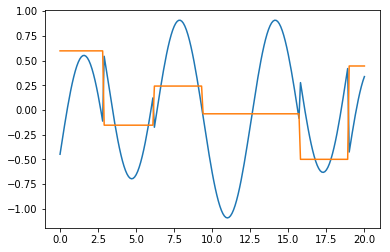

In [95]:
e4 = np.sin(X) - (f4.predict(data) + f3.predict(data) + f2.predict(data) + f1.predict(data) + f0)
f5 = tree.DecisionTreeRegressor(max_depth=1)
f5.fit(data,e4)
plt.plot(X,e4)
ensemble_preds_5 = f5.predict(data) + f4.predict(data) + f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
plt.plot(X,ensemble_preds_5)

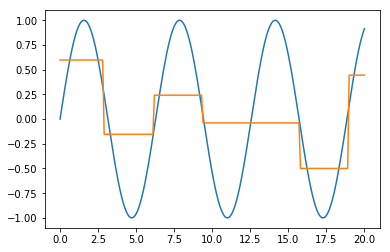

In [96]:
plt.plot(X,np.sin(X))
plt.plot(X,ensemble_preds_5)

In [44]:
def simple_boosting_algorithm(X,y,n_learners,learner,learning_rate,show_each_step = True):
    """Performs a simple ensemble boosting model 
    params: show_each_step - if True, will show with each additional learner"""
    f0 = y.mean()
    residuals = y - f0
    ensemble_predictions = np.full(len(y),fill_value=f0)
    plt.figure(figsize=(20,10))
    for i in range(n_learners):
        residuals = y - ensemble_predictions
        f = learner.fit(X.reshape(-1,1),residuals)
        ensemble_predictions = learning_rate * f.predict(X.reshape(-1,1)) + ensemble_predictions
        if show_each_step:
            plt.plot(X,y)
            plt.plot(X,ensemble_predictions)
            
    plt.plot(X,y)
    plt.plot(X,ensemble_predictions)
            
    plt.title('With ' + str(n_learners) + ' learners with a depth of '+ str(learner.max_depth) + ' and a learning rate of '+ str(learning_rate))
    
   

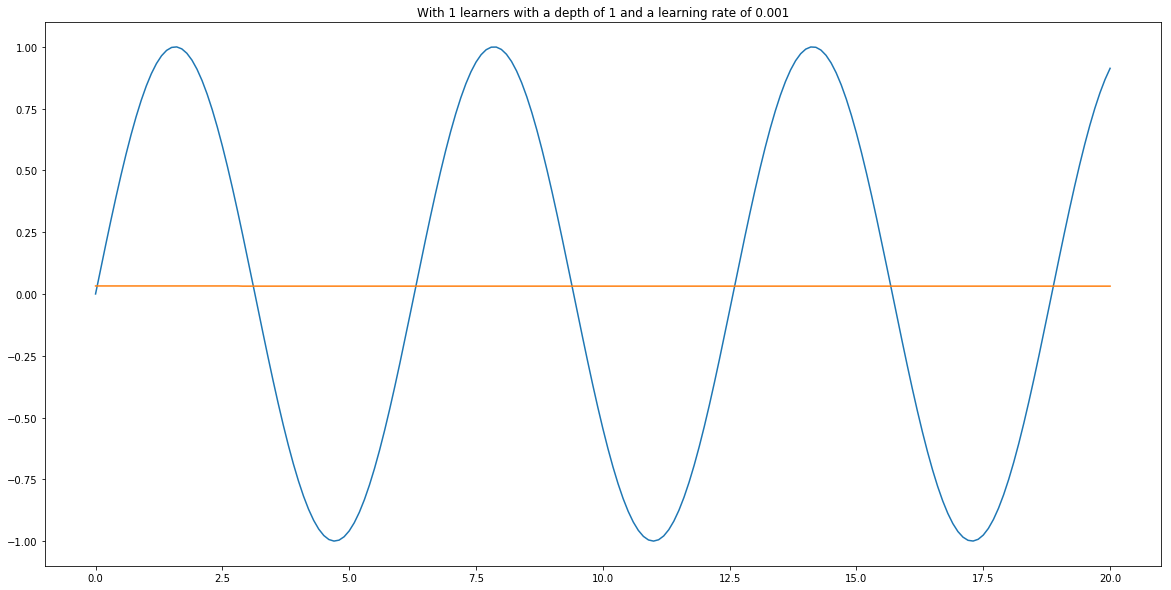

In [45]:
simple_boosting_algorithm(X,np.sin(X),1,tree.DecisionTreeRegressor(max_depth=1),0.001,False)

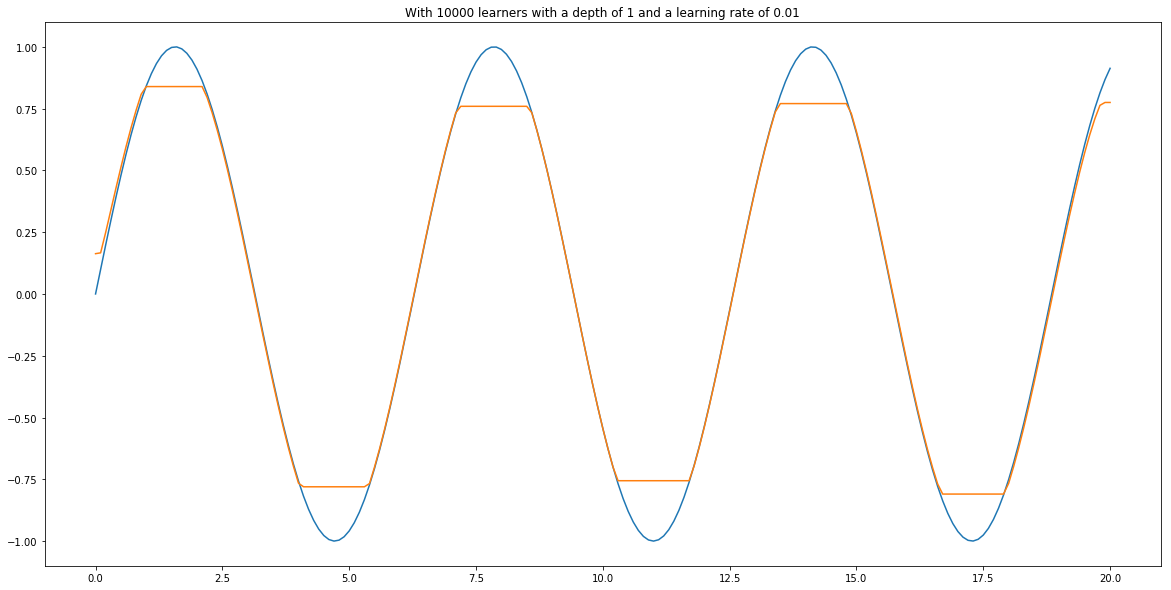

In [46]:
simple_boosting_algorithm(X,np.sin(X),10000,tree.DecisionTreeRegressor(max_depth=1),0.01,False)

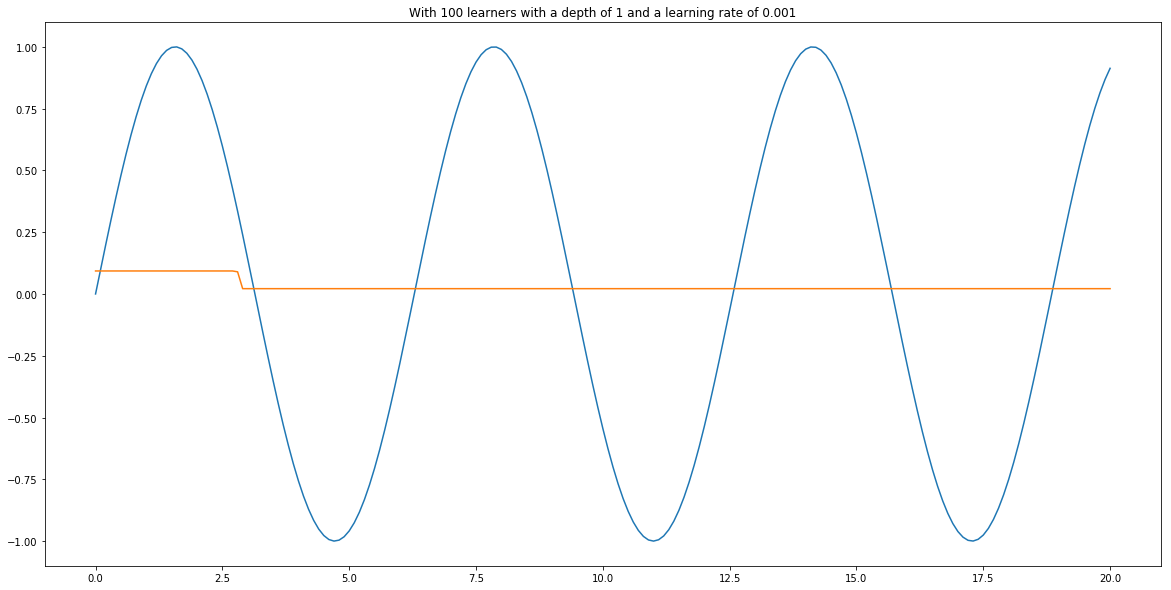

In [47]:
simple_boosting_algorithm(X,np.sin(X),100,tree.DecisionTreeRegressor(max_depth=1),0.001,False)

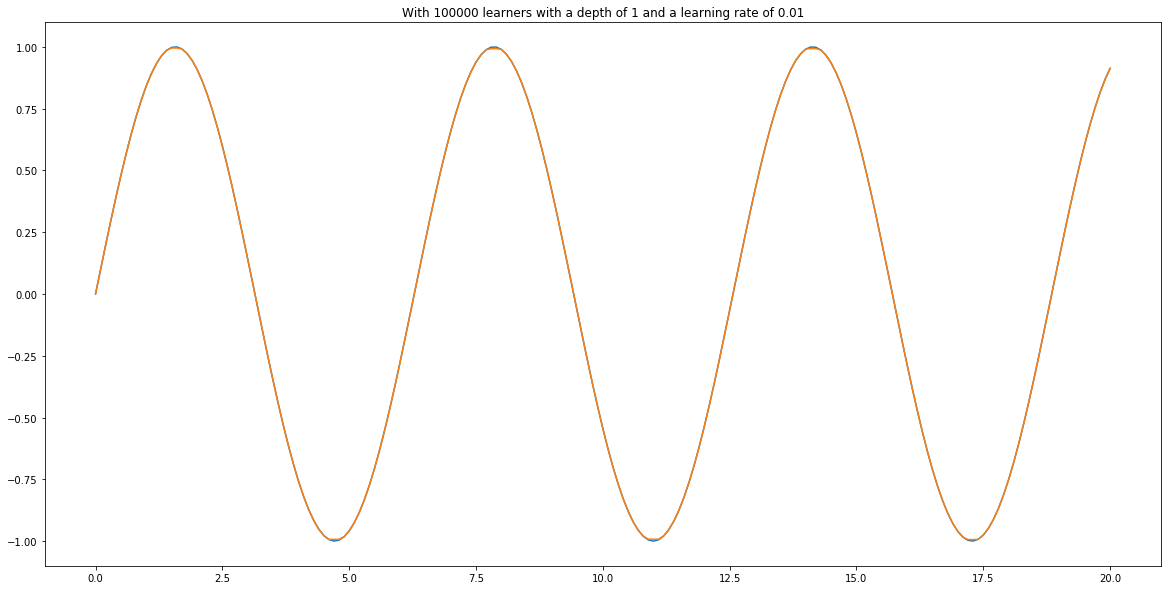

In [48]:
simple_boosting_algorithm(X,np.sin(X),100000,tree.DecisionTreeRegressor(max_depth=1),0.01,False)

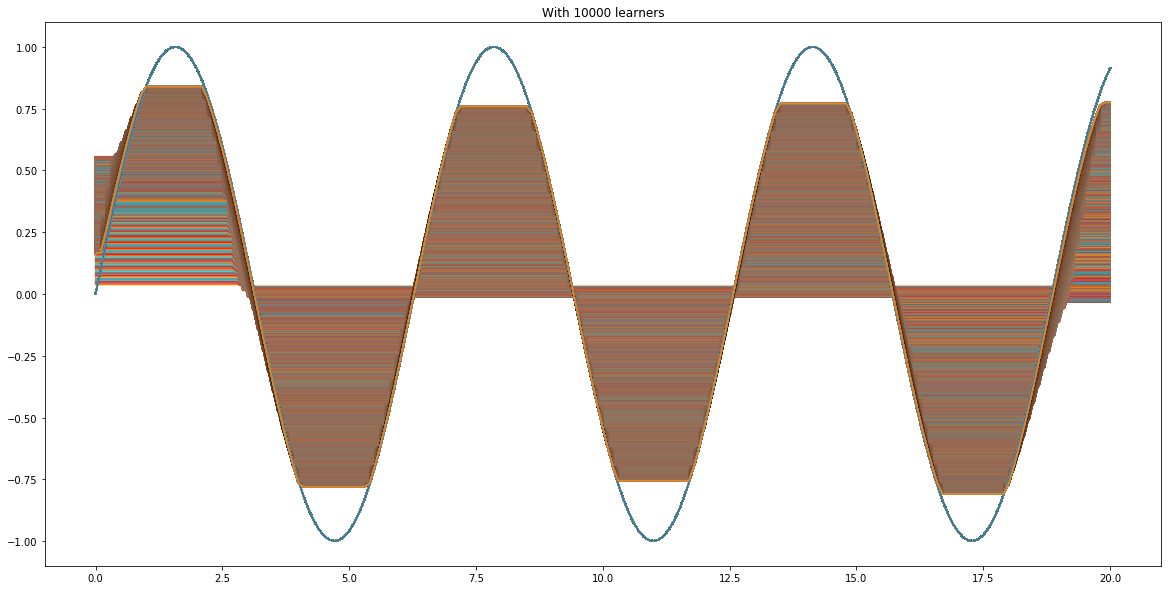

In [173]:
simple_boosting_algorithm(X,np.sin(X),10000,tree.DecisionTreeRegressor(max_depth=1),0.01)

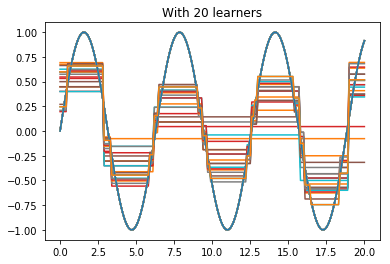

In [137]:
simple_boosting_algorithm(X,np.sin(X),20,tree.DecisionTreeRegressor(max_depth=1),0.001)

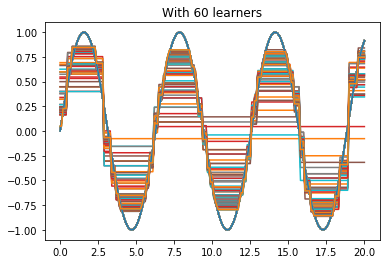

In [138]:
simple_boosting_algorithm(X,np.sin(X),60,tree.DecisionTreeRegressor(max_depth=1),0.001)

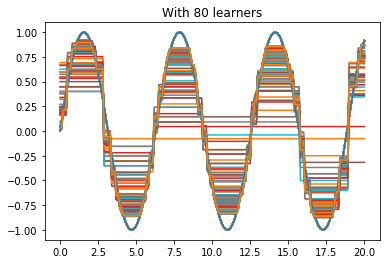

In [139]:
simple_boosting_algorithm(X,np.sin(X),80,tree.DecisionTreeRegressor(max_depth=1),0.001)

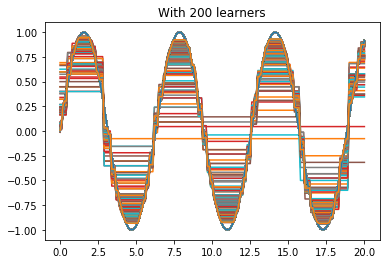

In [140]:
simple_boosting_algorithm(X,np.sin(X),200,tree.DecisionTreeRegressor(max_depth=1),0.001)